In [1]:
import csv
import math

from models import init_multilayer_model, build_observations, online_multilayer, big_e, Observation, init_perceptron_model, online_perceptron, predict_with_threshold


In [2]:
# weights from module 7 assignment
INITIAL_WEIGHTS = [
    [  # hidden layer initial weights
        [0.3, 0.3],
        [0.3, 0.3],
    ],
    [  # output layer initial weights
        [0.8],
        [0.8],
    ],
]

INITIAL_BIASES = [
    [
        [0, 0],
    ],
    [
        [0],
    ],
]

# each observation will be a row vector of feature values and will include the
# expected output value. It is assumed that the last value of each list of values
# is the output value
INITIAL_INPUTS: list[list[float]] = [
    [1, 1, 0.9],
    [-1, -1, 0.05],
]

In [3]:
multilayer = init_multilayer_model(2, 2, INITIAL_WEIGHTS, INITIAL_BIASES, eta=1)
inputs = build_observations(INITIAL_INPUTS)

online_multilayer(multilayer, inputs, 15)
# should agree with outputs for module 7 assignment
for i, ob in enumerate(inputs):
    print(f"observation {i+1}")
    print(f"activation value: {round(multilayer(ob.features),4)}")
    print(f"Big E: {round(big_e(multilayer, ob),4)}")

observation 1
activation value: 0.6583
Big E: 0.0292
observation 2
activation value: 0.3818
Big E: 0.055


In [4]:
#random weights
multilayer = init_multilayer_model(2, 2)
inputs = build_observations(INITIAL_INPUTS)

online_multilayer(multilayer, inputs, 15000) # very large number of cycles to see convergence
for i, ob in enumerate(inputs):
    print(f"observation {i+1}")
    print(f"activation value: {round(multilayer(ob.features),4)}")
    print(f"observation value: {ob.values[0][0]}")
    print(f"Big E: {round(big_e(multilayer, ob),4)}")

observation 1
activation value: 0.8994
observation value: 0.9
Big E: 0.0
observation 2
activation value: 0.053
observation value: 0.05
Big E: 0.0


In [5]:
def read_data(filename: str) -> list[Observation]:
    with open(filename, "r") as csvfile:
        reader = csv.DictReader(csvfile)
        return build_observations([
            [float(row["Lac"]),float(row["SOW"]),float(row["TACA"])] for row in reader
        ])
data = read_data("data.csv")

In [6]:
def test_train_split(data: list[Observation]) -> tuple[list, list]:
    return data[0::2], data[1::2]

train, test = test_train_split(data)

In [8]:
test

[Observation(features=array([[1.81, 1.02]]), values=array([[0.]])),
 Observation(features=array([[2.36, 1.6 ]]), values=array([[0.]])),
 Observation(features=array([[2.17, 2.08]]), values=array([[1.]])),
 Observation(features=array([[2.85, 2.91]]), values=array([[1.]])),
 Observation(features=array([[1.05, 1.93]]), values=array([[0.]])),
 Observation(features=array([[2.32, 1.73]]), values=array([[0.]])),
 Observation(features=array([[1.86, 1.31]]), values=array([[0.]])),
 Observation(features=array([[1.45, 2.19]]), values=array([[0.]])),
 Observation(features=array([[0.28, 0.71]]), values=array([[1.]])),
 Observation(features=array([[2.49, 1.52]]), values=array([[0.]]))]

In [9]:
#random weights
multilayer = init_multilayer_model(2, 2)
inputs = train

online_multilayer(multilayer, inputs, 75) # large-ish number 
print("versus test")
errors = []
for i, ob in enumerate(inputs):
    print(f"observation {i+1}")
    print(f"activation value: {round(multilayer(ob.features),4)}")
    print(f"observation value: {ob.values[0][0]}")
    error = big_e(multilayer, ob)
    print(f"Big E: {round(error,4)}")
    errors.append(error)
    
print(f"Total Error: {round(sum(errors), 4)}")
print()
print("versus train")
errors = []
for i, ob in enumerate(test):
    print(f"observation {i+1}")
    print(f"activation value: {round(multilayer(ob.features),4)}")
    print(f"observation value: {ob.values[0][0]}")
    error = big_e(multilayer, ob)
    print(f"Big E: {round(error,4)}")
    errors.append(error)
    
print(f"Total Error: {round(sum(errors), 4)}")

versus test
observation 1
activation value: 0.4931
observation value: 1.0
Big E: 0.1285
observation 2
activation value: 0.4904
observation value: 1.0
Big E: 0.1298
observation 3
activation value: 0.4852
observation value: 0.0
Big E: 0.1177
observation 4
activation value: 0.4968
observation value: 0.0
Big E: 0.1234
observation 5
activation value: 0.4853
observation value: 0.0
Big E: 0.1177
observation 6
activation value: 0.4851
observation value: 1.0
Big E: 0.1326
observation 7
activation value: 0.5001
observation value: 1.0
Big E: 0.1249
observation 8
activation value: 0.4903
observation value: 0.0
Big E: 0.1202
observation 9
activation value: 0.4929
observation value: 1.0
Big E: 0.1286
observation 10
activation value: 0.4881
observation value: 0.0
Big E: 0.1191
Total Error: 1.2426

versus train
observation 1
activation value: 0.4878
observation value: 0.0
Big E: 0.119
observation 2
activation value: 0.4856
observation value: 0.0
Big E: 0.1179
observation 3
activation value: 0.4863
obs

In [10]:
INITIAL_PERCEPTRON_WEIGHTS = [
    [0.24],
    [0.88]
]
INITIAL_PERCEPTRON_BIAS = [[0]]

observations = build_observations([[0.8, 0.9, 0.95]])

perceptron = init_perceptron_model(2, INITIAL_PERCEPTRON_WEIGHTS, INITIAL_PERCEPTRON_BIAS, eta=5.0)
online_perceptron(perceptron, observations, 75)
# confirm the perceptron has the same values as PA5
assert math.isclose(perceptron.activation_value(observations[0].features)[0][0], 0.9475, abs_tol=1e-4)


In [11]:
# new perceptron model with random weights
perceptron = init_perceptron_model(2, eta=0.1)

In [12]:
# train with test data for some number of cycles
online_perceptron(perceptron, train, 100)

In [13]:
errors = []
for i, ob in enumerate(test):
    print(f"observation {i+1}")
    print(f"activation value: {round(perceptron(ob.features),4)}")
    print(f"observation value: {ob.values[0][0]}")
    error = big_e(perceptron, ob)
    print(f"Big E: {round(error,4)}")
    errors.append(error)
    
print(f"Total Error: {round(sum(errors), 4)}")

observation 1
activation value: 0.3675
observation value: 0.0
Big E: 0.0675
observation 2
activation value: 0.202
observation value: 0.0
Big E: 0.0204
observation 3
activation value: 0.1562
observation value: 1.0
Big E: 0.356
observation 4
activation value: 0.0566
observation value: 1.0
Big E: 0.445
observation 5
activation value: 0.2882
observation value: 0.0
Big E: 0.0415
observation 6
activation value: 0.1877
observation value: 0.0
Big E: 0.0176
observation 7
activation value: 0.3041
observation value: 0.0
Big E: 0.0462
observation 8
activation value: 0.2033
observation value: 0.0
Big E: 0.0207
observation 9
activation value: 0.6499
observation value: 1.0
Big E: 0.0613
observation 10
activation value: 0.2012
observation value: 0.0
Big E: 0.0202
Total Error: 1.0965


In [14]:
perceptron.weights, perceptron.bias

(array([[-0.58063594],
        [-0.8815866 ]]),
 array([[1.40705856]]))

In [15]:
def compute_roc_points(model, data: list[Observation], thresholds: list[float]) -> list[tuple[float, float]]:
    y_true = [int(ob.values[0][0]) for ob in data]
    y_scores = [model(ob.features) for ob in data]

    roc_points = []
    for thresh in thresholds:
        y_preds = [int(score >=  thresh) for score in y_scores]

        TP = sum((p == 1 and y == 1) for p, y in zip(y_preds, y_true))
        TN = sum((p == 0 and y == 0) for p, y in zip(y_preds, y_true))
        FP = sum((p == 1 and y == 0) for p, y in zip(y_preds, y_true))
        FN = sum((p == 0 and y == 1) for p, y in zip(y_preds, y_true))

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

        roc_points.append((FPR, TPR, thresh))

    return sorted(roc_points, key=lambda x: x[0]) 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_with_thresholds(roc_points: list[tuple[float, float, float]]) -> None:
    fpr, tpr, thresholds = zip(*roc_points)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC Curve')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve with Thresholds")
    plt.grid(True)

    # Annotate all points with threshold values
    # for x, y, thresh in roc_points:
    #     label = f"{thresh:.2f}"
    #     plt.annotate(label, (x, y), textcoords="offset points", xytext=(4, 4), ha='left', fontsize=8)
    
    # Find best threshold based on Youden's J statistic
    best_point = max(roc_points, key=lambda x: x[1] - x[0])  # max(TPR - FPR)
    best_fpr, best_tpr, best_thresh = best_point
    label = f"{best_thresh:.2f}"
    plt.annotate(label, (best_fpr, best_tpr),textcoords="offset points", xytext=(4, 4), ha='left', fontsize=8)

    # Highlight best point on the plot
    plt.scatter([best_fpr], [best_tpr], color='red', zorder=5, label=f"Best Threshold: {best_thresh:.2f}")
    plt.legend()


    plt.legend()
    plt.show()


Example use of ROC plot code. Should use to generate plots once weights and biases are set for the network. 

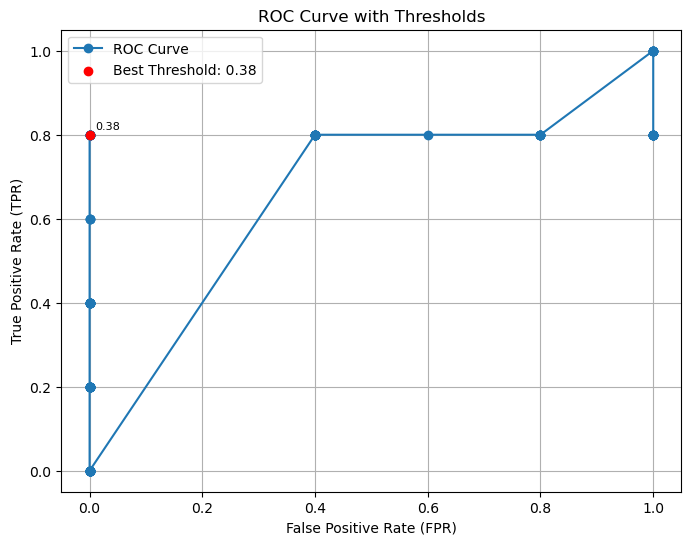

In [35]:
thresholds = np.linspace(0, 1, 100)
roc_points = compute_roc_points(perceptron, train, thresholds.tolist())
plot_roc_with_thresholds(roc_points)